#          CONTROLE CONTINU D'ANALYSE DE                                         DONNEES

## Les Participants

<table>
    <tr>
    <th>NOM ET PRENOM </th>
     <th>MATRICULE </th>
      </tr>
     <tr>
        <td>CHAHO CHIME PERSIDE JACKIE</td> 
        <td>22P094</td>
    </tr>
    <tr>
        <td>DIFFO DONGMO STEVE MERANDA</td> 
        <td>22P091</td>
    </tr>
    <tr>
        <td>DJEUMENI TIOGANG WINNIE</td> 
        <td>22P095</td>
    </tr>
    <tr>
        <td>DJOUMESSI MEGOUDJOU IDA</td> 
        <td>22P096</td>
    </tr>
    <tr>
        <td>EYENGA ZIBI ELISABETH</td> 
        <td>22P100</td>
    </tr>
    <tr>
        <td>GUIADEM KOUAM REVINE</td> 
        <td>22P102</td>
    </tr>
    <tr>
        <td>GUIMBANG CYRIELLE</td> 
        <td>21P578</td>
    </tr>
    <tr>
        <td>MEFO EVINA CELESTIN</td> 
        <td>22P104</td>
    </tr>
    <tr>
        <td>MOUAFFO SOKENG FRESNEL</td> 
        <td>22P093</td>
    </tr>
    <tr>
        <td>NANTIA ZAGUE AXEL FRISKYL</td> 
        <td>22P105</td>
    </tr>
</table>


## Table de Matière
<ul>
    <li><a href="#INTRO">INTRODUCTION</a></li>
    <li><a href="#Préparation">Préparation Des Données</a></li>
    <li><a href="#exploration">Exploration Des Données</a></li>
    <li><a href="#conclu">Conclusion</a></li>
</ul>   

<a id=INTRO></a>
# INTRODUCTION
> Ce rapport analyse les Statistiques sur les vidéos youtube  à partir d'un ensemble de données.Cet ensemble est issus de source Kaggle.Cet ensembe a pour nom [Statistiques sur les vidéos youtube tendance ]. Il se trouve sur l'URL   
https://www.kaggle.com/datasets/datasnaek/youtube-new

>L'objectif principal ***est de déterminer les facteurs clés influençant Le nombre de likes des vidéos sur Youtube***.

In [1]:
# Importer les modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections

# Commande magique
%matplotlib inline

<a id=Préparation></a>
## Préparation des Données 
>Dans cette section du rapport, nous allons charger les données ,vérifier leurs propretés et les nettoyer.
### Propriété Générale
>Les données sont divisées en 3 fichiers au format CSV

In [2]:
#charger les trois fichiers csv en DataFrame
df1=pd.read_csv('CAvideos.csv')
df2=pd.read_csv('DEvideos.csv')
df3=pd.read_csv('FRvideos.csv')
#afficher les types et les dimensions des trois dataframes
print('\033[1m Type de df1:\033[ 0m')
print(type(df1))
print('\033[1m Dimensiondf1:\033[0m')
print(df1.shape)
print('\033[1m Type de df2:\033[ 0m')
print(type(df2))
print('\033[1m Dimensiondf2:\033[0m')
print(df2.shape)
print('\033[1m Type de df3:\033[ 0m')
print(type(df3))
print('\033[1m Dimension df3:\033[0m')
print(df3.shape)

 Type de df1:[ 0m
<class 'pandas.core.frame.DataFrame'>
 Dimensiondf1:
(40881, 16)
 Type de df2:[ 0m
<class 'pandas.core.frame.DataFrame'>
 Dimensiondf2:
(40840, 16)
 Type de df3:[ 0m
<class 'pandas.core.frame.DataFrame'>
 Dimension df3:
(40724, 16)


## Nettoyage df1

In [3]:
#affichage des dimensions de df1
print(df1.shape)

#affichage df1 info
print(df1.info())

#affichage des 5 premiers éléments du df1
df1.head()

(40881, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bo

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


### Vérification des valeurs vides et dupliquées

In [4]:
#Vérification des valeurs vides
df1.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

>Nous constatons que nous avons des valeurs vides 


#### Enlevons les lignes avec les valeurs vides

In [5]:
df1.dropna(inplace=True)

In [6]:
# Vérifions si nous avons des valeurs dupliquées
df1.duplicated().sum()

0

>nous n'avons pas de valeurs dupliquées 

## Nettoyons df2

In [7]:
#affichons les dimensions du df2
print(df2.shape)

#affichons les informations du df2
print(df2.info())

#affichons les 5 premieres lignes du df2
df2.head()

(40840, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40840 non-null  object
 1   trending_date           40840 non-null  object
 2   title                   40840 non-null  object
 3   channel_title           40840 non-null  object
 4   category_id             40840 non-null  int64 
 5   publish_time            40840 non-null  object
 6   tags                    40840 non-null  object
 7   views                   40840 non-null  int64 
 8   likes                   40840 non-null  int64 
 9   dislikes                40840 non-null  int64 
 10  comment_count           40840 non-null  int64 
 11  thumbnail_link          40840 non-null  object
 12  comments_disabled       40840 non-null  bool  
 13  ratings_disabled        40840 non-null  bool  
 14  video_error_or_removed  40840 non-null  bo

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...


## Vérifions les valeurs vides et dupliquées df2

In [8]:
#vérifions les valeurs vides
df2.isnull().sum()


video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1552
dtype: int64

>nous avons des valeurs vides

>##### Enlevons les lignes avec les valeurs vides

In [9]:
df2.dropna(inplace=True)

In [10]:
# Vérifions les valeurs dupliquées
df2.duplicated().sum()

0

>Nous n'avons pas de valeurs dupliquées

## Nettoyons df3

In [11]:
# affichons les dimensions du df3
print(df3.shape)

# affichons les informations du df3
print(df3.info())

# affichons les cinq premieres ligne du df3
df3.head()

(40724, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40724 non-null  object
 1   trending_date           40724 non-null  object
 2   title                   40724 non-null  object
 3   channel_title           40724 non-null  object
 4   category_id             40724 non-null  int64 
 5   publish_time            40724 non-null  object
 6   tags                    40724 non-null  object
 7   views                   40724 non-null  int64 
 8   likes                   40724 non-null  int64 
 9   dislikes                40724 non-null  int64 
 10  comment_count           40724 non-null  int64 
 11  thumbnail_link          40724 non-null  object
 12  comments_disabled       40724 non-null  bool  
 13  ratings_disabled        40724 non-null  bool  
 14  video_error_or_removed  40724 non-null  bo

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...


## Vérifions les valeurs vides et dupliquées df3

In [12]:
#vérifions les valeurs vides
df3.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               2912
dtype: int64

>Nous constaons que nous avons des valeurs vides à la colonne 'description' 

#### Enlevons les lignes constituées des valeurs vides

In [13]:
df3.dropna(inplace=True)

In [14]:
#vérifions si on a des valeurs dupliquées dans df3
df3.duplicated().sum()

0

>on constate que nous n'avons pas des valeurs dupliquées

### Fusion des Trois DataFrames `df1` , `df2` et`df3`

> Ces trois DataFrames sont relatives à la gestion des Statistiques sur les vidéos youtube. Ils contiennent des caractéristiques similaires.  

>Nous pensons qu'avec les caractéristiques similaires, il est possible de déterminer ***les facteurs  qui influencent le nombre de likes des vidéos youtube***


### Concatenation des trois Dataframes

In [15]:
# Concatenation et sauvegarde des dataframes résultant 
df=pd.concat([df1,df2,df3])
df.to_csv('youtubedatavidéos.csv')

<a id=exploration></a>
# Analyse Exploratoire Des Données

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116685 entries, 0 to 40722
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                116685 non-null  object
 1   trending_date           116685 non-null  object
 2   title                   116685 non-null  object
 3   channel_title           116685 non-null  object
 4   category_id             116685 non-null  int64 
 5   publish_time            116685 non-null  object
 6   tags                    116685 non-null  object
 7   views                   116685 non-null  int64 
 8   likes                   116685 non-null  int64 
 9   dislikes                116685 non-null  int64 
 10  comment_count           116685 non-null  int64 
 11  thumbnail_link          116685 non-null  object
 12  comments_disabled       116685 non-null  bool  
 13  ratings_disabled        116685 non-null  bool  
 14  video_error_or_removed  116685 non-nu

In [17]:
# Statistique descriptive de l'ensemble des données
print('\033[1m Résumé des Statistiques \033[0m')
df.describe(percentiles = [0.25, 0.50, 0.75, 0.95, 0.99]).round(1)

 Résumé des Statistiques 


,category_id,views,likes,dislikes,comment_count
count,116685.0,116685.0,116685.0,116685.0,116685.0
mean,20.6,746616.2,27383.0,1462.2,3344.3
std,6.9,2667089.6,111807.1,15696.1,18430.4
min,1.0,223.0,0.0,0.0,0.0
25%,20.0,41356.0,796.0,39.0,123.0
50%,24.0,174616.0,3964.0,170.0,546.0
75%,24.0,568271.0,16618.0,615.0,1947.0
95%,27.0,2800578.2,115130.6,4473.8,13074.0
99%,28.0,9999438.7,378970.0,20723.7,42302.1
max,44.0,137843120.0,5053338.0,1602383.0,1114800.0


C:\Users\STEVE DIFFO\AppData\Local\Temp\ipykernel_9664\3395175913.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


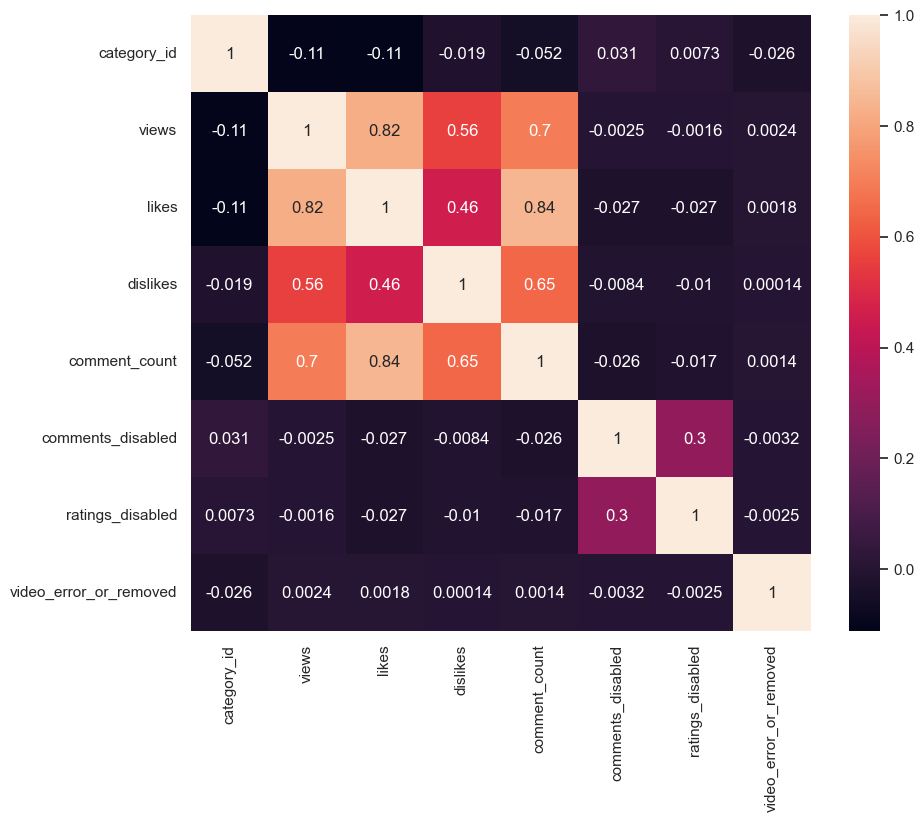

In [18]:
corrMatrix = df.corr()
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

Ce diagramme indique les correlations qui existent entre les differentes caracteristiques quantitatives de notre dataframe

### Question de recherche 1 : Est-ce que le nombre de vues influence le nombre de likes des vidéos youtubes ?

> Premièrement, affichons la distribution des vues `Views`

Text(0, 0.5, 'Fréquence')

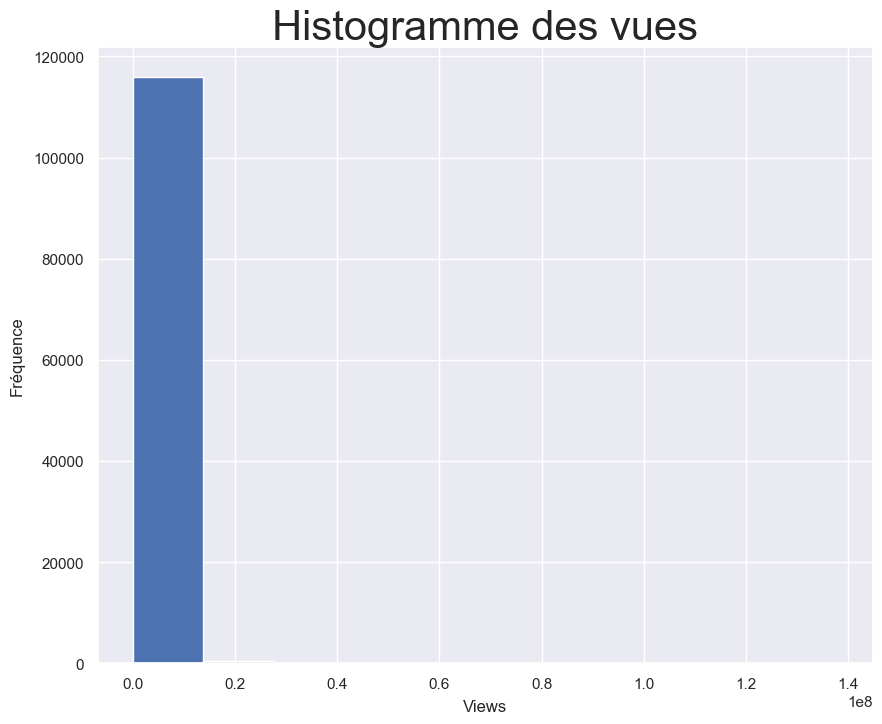

In [19]:
#dessinons l'histogramme de la colonne` Views`plt.figure(figzise=[2,1])
plt.hist(data=df,x='views')
plt.title('Histogramme des vues',fontsize=30,y=1.0)
plt.xlabel('Views',labelpad=6)
plt.ylabel('Fréquence',labelpad=6)

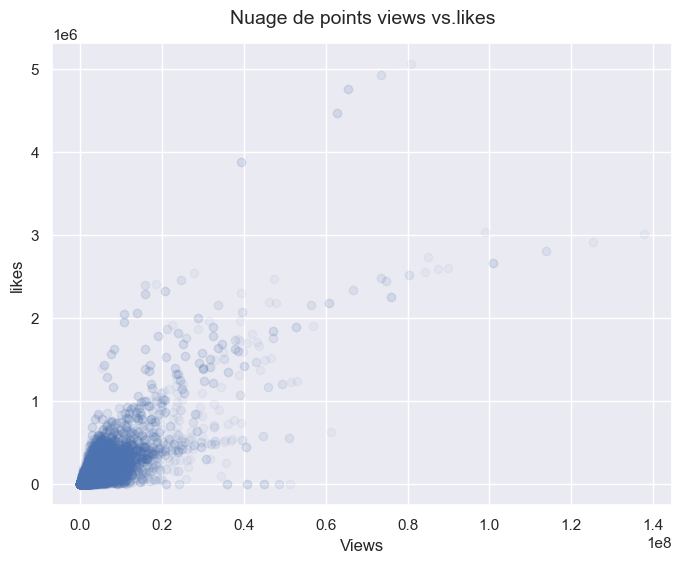

In [20]:
# Traçons un  plot pour les views vs likes 
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x ='views' , y = 'likes', alpha = 1/20)
plt.title('Nuage de points views vs.likes', fontsize=14, y=1.025)
plt.xlabel('Views')
plt.ylabel('likes')
plt.show()

On se rend compte a partir de ce graphe que le nombre de vues et le nombre de likes sont liés et croissent ensemble.

### Question de recherche 2 : Est-ce que le nombre de commentaires influence le nombre de likes des vidéos youtubes ?

> Premièrement, affichons la distribution des `comment_count`

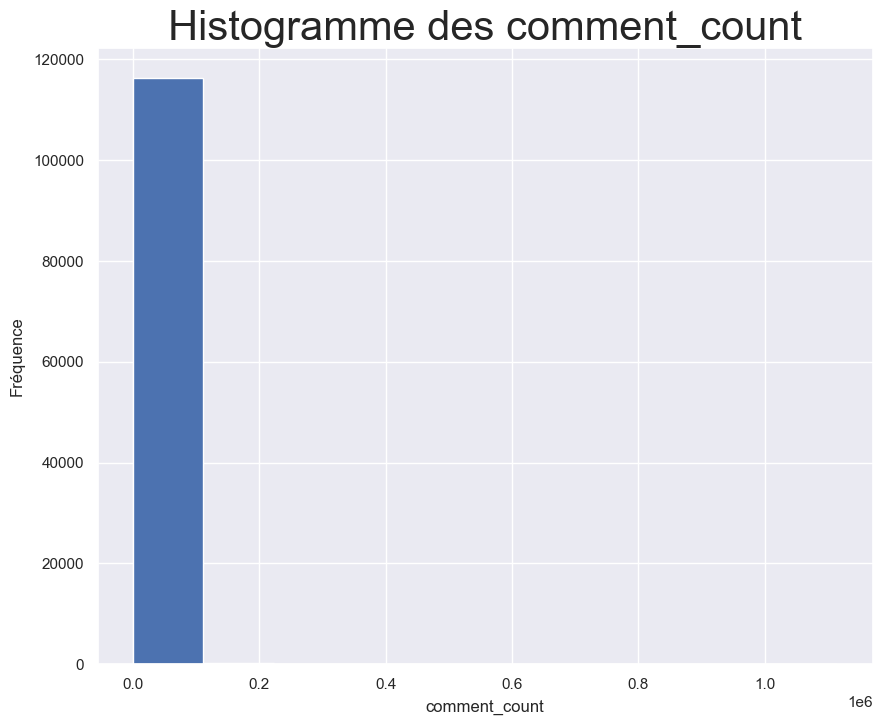

In [21]:
#dessinons l'histogramme de la colonne`comment_count`plt.figure(figzise=[2,1])
plt.hist(data=df,x='comment_count')
plt.title('Histogramme des comment_count',fontsize=30,y=1.0)
plt.xlabel('comment_count',labelpad=6)
plt.ylabel('Fréquence',labelpad=6)
plt.show()

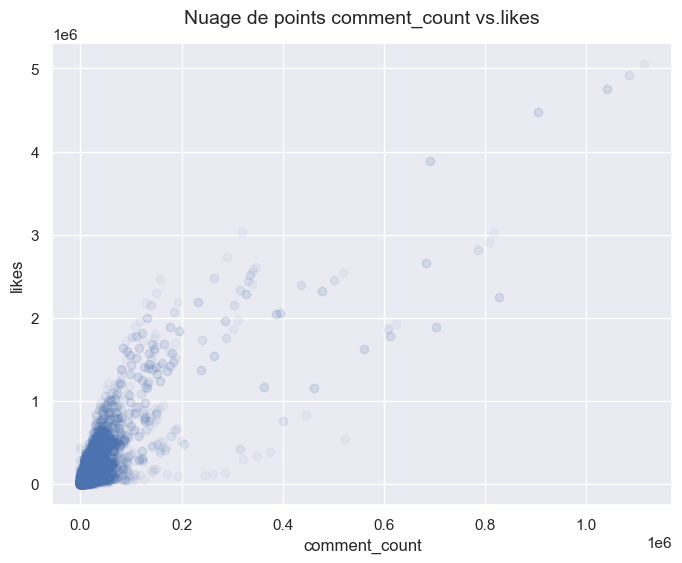

In [22]:
# Traçons un  plot pour les comment_count vs likes
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x ='comment_count' , y = 'likes', alpha = 1/20)
plt.title('Nuage de points comment_count vs.likes', fontsize=14, y=1.025)
plt.xlabel('comment_count')
plt.ylabel('likes')
plt.show()

On se rend compte à partir de ce graphe que le nombre de commentaires et le nombre de likes sont liés et croissent ensemble.

### Question de recherche 3 
#### Est-ce que  le titre de la chaine   (`channel_title`)   ou le temps de publication (`publish_time`),   la désactivation des commentaires (`comments_disabled`) ou la désactivation des notes  (`ratings_disabled`), les erreurs ou le retrait de la vidéo (`video_error_or_removed`),  influencent le nombre de likes des videos?


 > Pour répondre à cette question de recherche portant sur des variables qualitatives, nous allons d'abord regrouper les différentes valeurs de caractéristiques concernées, ensuite calculer les différentes moyennes correspondantes de la colonne `likes`.


In [23]:
mean_likes_channel_title = df.groupby("channel_title")["likes"].mean().sort_values(ascending=False)
print(mean_likes_channel_title)

channel_title
ibighit                2.498016e+06
DrakeVEVO              1.775407e+06
ChildishGambinoVEVO    1.737522e+06
ArianaGrandeVevo       1.508706e+06
YouTube Spotlight      1.483824e+06
                           ...     
Thomas Pöppel          0.000000e+00
112 Украина            0.000000e+00
RDC.INFOS DIASPORA     0.000000e+00
AfD Kompakt TV         0.000000e+00
News24 Albania         0.000000e+00
Name: likes, Length: 13708, dtype: float64


On se rend compte que la chaine YouTube ibignit totalise un plus grand nombre de like au niveau des videos qui y sont publiees.En fonction de la chaine, certaines videos sont plus likees que d'autres.

In [36]:
mean_likes_publish_time = df.groupby("publish_time")["likes"].mean().sort_values(ascending=False)
print(mean_likes_publish_time)

publish_time
2018-05-18T09:00:02.000Z    4.517094e+06
2017-11-29T13:26:24.000Z    2.316378e+06
2017-11-24T09:00:02.000Z    2.286679e+06
2017-12-06T17:58:51.000Z    2.212390e+06
2018-03-01T15:00:02.000Z    2.187376e+06
                                ...     
2018-04-18T16:02:05.000Z    0.000000e+00
2017-11-30T15:13:31.000Z    0.000000e+00
2017-12-30T17:20:37.000Z    0.000000e+00
2018-04-21T18:34:13.000Z    0.000000e+00
2018-03-27T06:46:00.000Z    0.000000e+00
Name: likes, Length: 63649, dtype: float64


On se rend compte que la date de publication qui a eu le plus grand nombre de like est 2018-05-18T09:00:02.000z

In [37]:
mean_likes_comments_disabled = df.groupby("comments_disabled")["likes"].mean().sort_values(ascending=False)
print(mean_likes_comments_disabled)

comments_disabled
False    27813.106994
True      6301.525504
Name: likes, dtype: float64


On se rend compte que l'ensemble des videos dont les commentaires n'ont pas été desactives presente la plus grande moyenne de likes

In [38]:
mean_likes_ratings_disabled = df.groupby("ratings_disabled")["likes"].mean().sort_values(ascending=False)
print(mean_likes_ratings_disabled)

ratings_disabled
False    27722.752766
True         0.000000
Name: likes, dtype: float64


On se rend compte que l'ensemble des videos dont l'evaluation n'a pas été désactivée presente la plus grande moyenne de likes

In [41]:
mean_likes_video_error_or_removed= df.groupby("video_error_or_removed")["likes"].mean().sort_values(ascending=False)
print(mean_likes_video_error_or_removed)

video_error_or_removed
True     36310.233333
False    27378.411627
Name: likes, dtype: float64


On se rend compte que les videos ayant eu des erreurs ou ayant été supprimées ont totalisé la plus grande moyenne de likes

> Nous avons travaillé avec trois Dataset provenant du même environnement . De plus, ils contenaient moins de disparités sur la représentation des contenus. 

> Mais, à partir des résultats obtenus, on a l'impression que les caractéristiques suivantes : le nombre de vues ,le titre  des chaines ,le temps de publication,le comments_disabled , le ratings_disabled, video_error_or_removed, peuvent être des facteurs qui influencent le nombre de likes des vidéos sur youtube. D'apres cette premiere analyse, le nombre de like croit avec le nombre de vues, le nombre de commentaire, il croit aussi en fonction du titre de la chaine Youtube qui diffuse la video. Nous avons aussi remarque que, les videos dont les commentaires et l'evaluation ont été desactives presentent le plus faible taux de likes. 

> ***Du moment où, nous n'avons plus de temps pour rechercher d'autres DataSet sur les sites open data pour les analyser, nous allons vérifier l'assertion précédente sur un seul de nos DataSet.***

>Nous choisissons le deuxième DataSet.


## Analyse du deuxième Dataset

In [150]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39288 entries, 0 to 40839
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                39288 non-null  object
 1   trending_date           39288 non-null  object
 2   title                   39288 non-null  object
 3   channel_title           39288 non-null  object
 4   category_id             39288 non-null  int64 
 5   publish_time            39288 non-null  object
 6   tags                    39288 non-null  object
 7   views                   39288 non-null  int64 
 8   likes                   39288 non-null  int64 
 9   dislikes                39288 non-null  int64 
 10  comment_count           39288 non-null  int64 
 11  thumbnail_link          39288 non-null  object
 12  comments_disabled       39288 non-null  bool  
 13  ratings_disabled        39288 non-null  bool  
 14  video_error_or_removed  39288 non-null  bool  
 15  de

In [151]:
# Statistiques descriptives pour l'ensemble de l'ensemble de données
print('\033[1m Résumé des statistiques\r\n\033[0m')
df2.describe(percentiles = [0.25, 0.50, 0.75, 0.95, 0.99]).round(1)

 Résumé des statistiques



,category_id,views,likes,dislikes,comment_count
count,39288.0,39288.0,39288.0,39288.0,39288.0
mean,20.7,615519.6,22573.0,1437.2,2868.5
std,7.0,2387562.6,103670.8,14857.9,17785.9
min,1.0,518.0,0.0,0.0,0.0
25%,20.0,28042.8,585.0,31.0,85.0
50%,24.0,123601.0,2893.0,141.0,395.0
75%,24.0,453899.0,12374.0,549.0,1428.0
95%,26.0,2290565.4,90594.3,4505.0,11316.8
99%,28.0,8291422.9,335803.8,21060.2,38065.9
max,44.0,113876217.0,4924056.0,1470386.0,1084435.0


C:\Users\STEVE DIFFO\AppData\Local\Temp\ipykernel_1800\1544078005.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df2.corr()


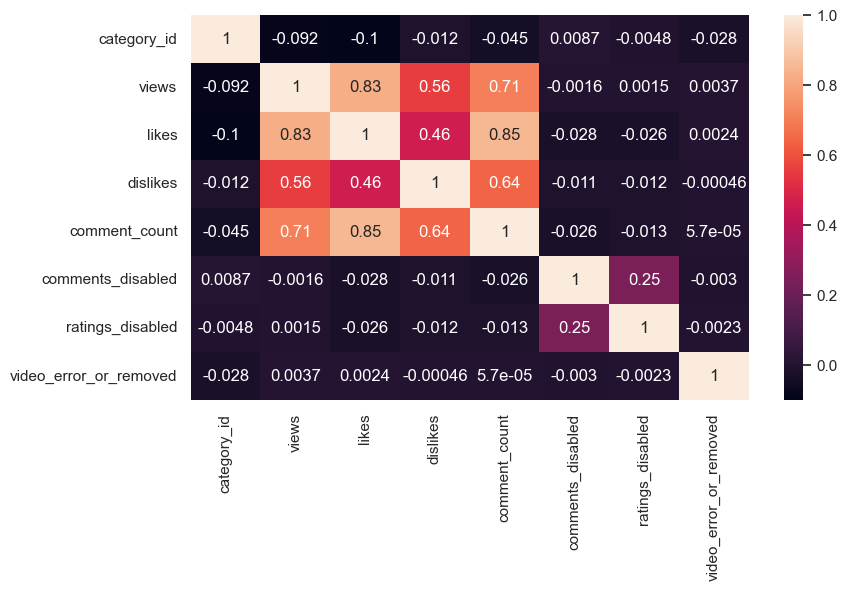

In [152]:
corrMatrix = df2.corr()
sns.set(rc={'figure.figsize':(9,5)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Question de recherche 4 : Est-ce que les vues constituent un facteur qui influence le nombre de likes des vidéo youtube ?

##### Affichons la distribution des vues

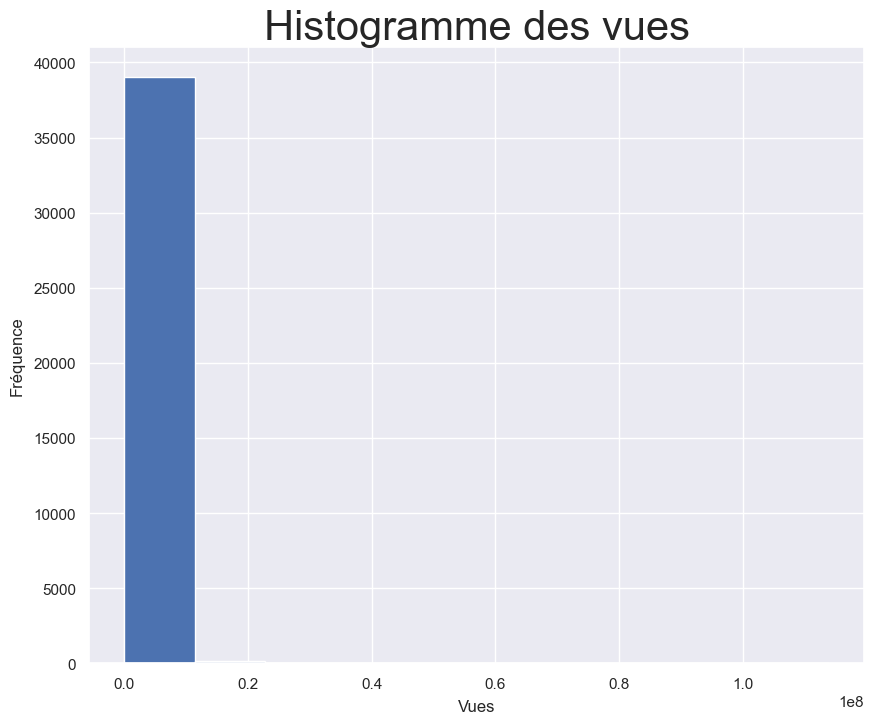

In [42]:
#déssinons l'histogramme de la colonne` Views`plt.figure(figzise=[2,1])
plt.hist(data=df2,x='views')
plt.title('Histogramme des vues',fontsize=30,y=1.0)
plt.xlabel('Vues',labelpad=6)
plt.ylabel('Fréquence',labelpad=6)
plt.show()

In [43]:
# Calcule de la médiane de views
df2.views.median()

123601.0

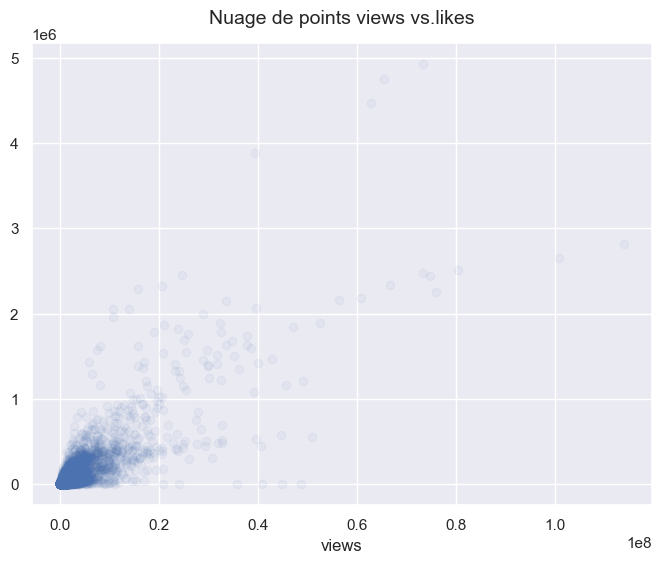

In [44]:
# Traçons un  plot pour les views vs likes 
plt.figure(figsize = [8, 6])
plt.scatter(data = df2, x ='views' , y = 'likes', alpha = 1/20)
plt.title('Nuage de points views vs.likes', fontsize=14, y=1.025)
plt.xlabel('views')

plt.show()

On se rend compte a partir de ce graphe, comme dans la premiere etude que le nombre de vues et le nombre de likes sont lies et croissent ensemble.

### Question de recherche 5 : Est-ce que le nombre de commentaire est un facteur qui influence le nombre de likes des vidéo youtube ?

Affichons la distribution des comment_count

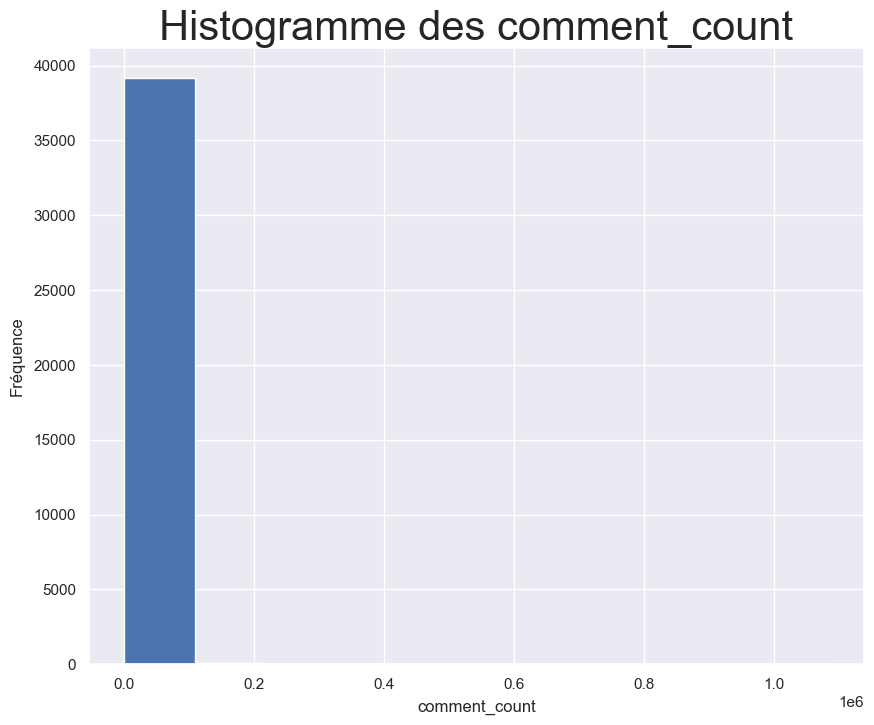

In [45]:
#déssinons l'histogramme de la colonne` comment_count`plt.figure(figzise=[2,1])
plt.hist(data=df2,x='comment_count')
plt.title('Histogramme des comment_count',fontsize=30,y=1.0)
plt.xlabel('comment_count',labelpad=6)
plt.ylabel('Fréquence',labelpad=6)
plt.show()

In [46]:
# Calcule de la médiane de studytime
df2.comment_count.median()

395.0

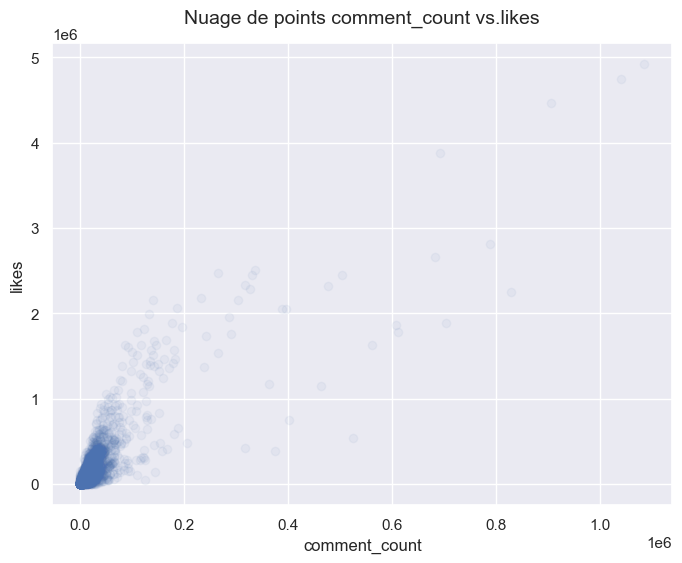

In [48]:
# Traçons un  plot pour les comment_count vslikes  
plt.figure(figsize = [8, 6])
plt.scatter(data = df2, x ='comment_count' , y = 'likes', alpha = 1/20)
plt.title('Nuage de points comment_count vs.likes', fontsize=14, y=1.025)
plt.xlabel('comment_count')
plt.ylabel('likes')
plt.show()

On se rend compte a partir de ce graphe, comme dans la premiere etude que le nombre de commentaires et le nombre de likes sont lies et croissent ensemble.

In [49]:
mean_likes_channel_title = df2.groupby("channel_title")["likes"].mean().sort_values(ascending=False)
print(mean_likes_channel_title)

channel_title
ibighit                                       2.524239e+06
YouTube Spotlight                             1.795280e+06
ChildishGambinoVEVO                           1.742282e+06
DrakeVEVO                                     1.661826e+06
David Dobrik                                  1.553233e+06
                                                  ...     
Elo 1347                                      0.000000e+00
Новости СВЕРХДЕРЖАВЫ                          0.000000e+00
Kathi.                                        0.000000e+00
KrleSB                                        0.000000e+00
Angelika Haas - Einfühlsame Lebensberatung    0.000000e+00
Name: likes, Length: 5688, dtype: float64


On se rend compte que la chaine YouTube ibignit totalise un plus grand nombre de like au niveau des videos qui y sont publiees.En fonction de la chaine, certaines videos sont plus likees que d'autres.

In [50]:
mean_likes_publish_time = df2.groupby("publish_time")["likes"].mean().sort_values(ascending=False)
print(mean_likes_publish_time)

publish_time
2018-05-18T09:00:02.000Z    4.506318e+06
2017-11-24T09:00:02.000Z    2.276903e+06
2017-11-29T13:26:24.000Z    2.236614e+06
2017-12-06T17:58:51.000Z    2.152146e+06
2018-05-06T15:00:02.000Z    2.120827e+06
                                ...     
2017-12-13T17:18:05.000Z    0.000000e+00
2018-03-27T21:56:14.000Z    0.000000e+00
2018-03-29T11:30:54.000Z    0.000000e+00
2017-12-13T05:00:01.000Z    0.000000e+00
2018-05-12T13:55:02.000Z    0.000000e+00
Name: likes, Length: 26998, dtype: float64


Nous remarquons que la date de publication qui a eu le plus grand nombre de like est 2018-05-18T09:00:02.000z

In [51]:
mean_likes_comments_disabled = df2.groupby("comments_disabled")["likes"].mean().sort_values(ascending=False)
print(mean_likes_comments_disabled)

comments_disabled
False    23033.886661
True      4519.324131
Name: likes, dtype: float64


On se rend compte que l'ensemble des videos dont l'evaluation n'a pas ete desactivee presente la plus grande moyenne de likes

 En confirmation de la premiere etude faite, à partir des résultats obtenus, on a l'impression que les caractéristiques suivantes : le nombre de vues ,le titre des vidéo,le temps de publication,le comments_disabled , le ratings_disabled, video_error_or_removed, peuvent être des facteurs qui influencent le nombre de likes des vidéos sur youtube. D'apres cette premiere analyse, le nombre de like croit avec le nombre de vues, le nombre de commentaire, il croit aussi en fonction du titre de la chaine Youtube qui diffuse la video. Nous avons aussi remarque que, les videos dont les commentaires et l'evaluation ont ete desactives presentent le plus faible taux de likes. 


<a id='conclu'></a>
## Conclusion
>Ce rapport a porté sur la détermination des facteurs clés qui influence le nombre de likes des vidéo youtube à partir des trois ensembles de données [CAvideos.csv] , [DEvideos.csv]et [FRvideos.csv] provenant de la même source . 

>A l'issue de l'analyse, on peut en déduire que :
> la fusion de plusieurs DataSet peut compromettre les questions de recherche.

> plus une vidéo est dans une chaine ayant un bon titre  plus elle a un grand nombre de vue et elle est commentée, donc ces trois facteurs semblent faire partie des facteurs clés qui favorisent le nombre de likes des vidéos sur youtube. De plus lorsque les commentaires et l'evaluation des videos ne sont pas desactives, les internautes sont plus enclins a liker les videos 